<a href="https://colab.research.google.com/github/YosukeSugiura/Introduction_to_Programming/blob/minor/%E6%B6%88%E8%B2%BB%E8%80%85%E7%89%A9%E4%BE%A1%E6%8C%87%E6%95%B0%E3%81%AE%E3%83%A2%E3%83%87%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 51.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=fa8582236be4f8923f9ace1128a32bd5134e182bd5aa2647724e5921cc91bff7
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize_matplotlib


Linear Regression
R2 Score : 0.93
R2 Score : 1.0
R2 Score : 1.0
R2 Score : 1.0
Ridge Regression
R2 Score : 0.93
R2 Score : 0.99
R2 Score : 0.99
R2 Score : 0.99
Linear Regression
 2023年の消費者物価指数：102.3 
 2030年の消費者物価指数：101.6 
 2023年の消費者物価指数：105.6 
 2030年の消費者物価指数：175.9 
 2023年の消費者物価指数：112.9 
 2030年の消費者物価指数：543.6 
 2023年の消費者物価指数：2883.6 
 2030年の消費者物価指数：543731531.1 
Ridge Regression
 2023年の消費者物価指数：102.1 
 2030年の消費者物価指数：101.4 
 2023年の消費者物価指数：102.0 
 2030年の消費者物価指数：53.9 
 2023年の消費者物価指数：107.9 
 2030年の消費者物価指数：899.6 
 2023年の消費者物価指数：175.4 
 2030年の消費者物価指数：1603650.5 


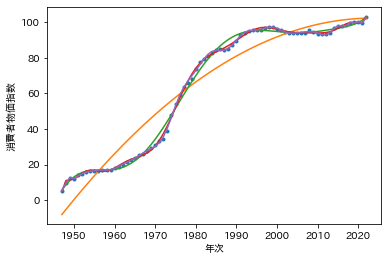

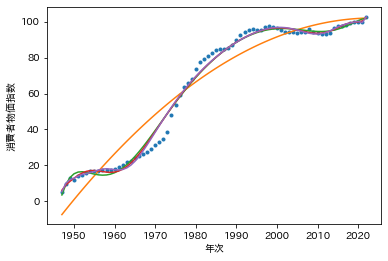

In [21]:
"""
    多項式回帰による予測
    
    注意：このコードの実行前にに以下のコードを実行してください．
    
    !pip install japanize-matplotlib
    
"""


"""
モジュールのインポート
"""
import numpy as np  # Numpyモジュール
import pandas as pd # Pandasモジュール
import scipy as sp  # 数値計算用モジュール
import matplotlib.pyplot as plt   # プロット用モジュール
import japanize_matplotlib # 日本語表示用モジュール

from sklearn.preprocessing import PolynomialFeatures # 回帰分析する入力を定める関数
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score # R2スコア(どれだけモデルがデータにマッチしているか)算出

"""
データの読みこみ
"""
input_file = 'bukka.csv'  # 読み込むファイル名
input_data = pd.read_csv(input_file)
input_data = np.array(input_data)

years = input_data[:,0] # 年次
bukka = input_data[:,1] # 消費者物価指数

# おまじない (配列サイズを1次元から2次元に拡張)
years = years[:,np.newaxis]
bukka = bukka[:,np.newaxis]

"""
データの標準化
"""
from sklearn.preprocessing import StandardScaler
scaler_year = StandardScaler()
scaler_bukka = StandardScaler()
years_std = scaler_year.fit_transform(years) # 標準化した年次
bukka_std = scaler_bukka.fit_transform(bukka) # 標準化した消費者物価指数

"""
多項式回帰：degreeで○次関数を決める．
"""
# 年次を入力として消費者物価指数を予測する．
pf1 = PolynomialFeatures(degree=2) # 2次関数(直線)を使用
pf2 = PolynomialFeatures(degree=8) # 2次関数(直線)を使用
pf3 = PolynomialFeatures(degree=16) # 2次関数(直線)を使用
pf4 = PolynomialFeatures(degree=32) # 2次関数(直線)を使用
pf_list = [pf1, pf2, pf3, pf4]

# 2023年，2030年の予測
years_future = np.array([2023,2030]) # 予測したい年のデータ
years_future = years_future[:,np.newaxis] # おまじない
years_future = scaler_year.transform(years_future) # 標準化

# 消費者物価指数
inputs, inputs_ft = [], []
for pf in pf_list:
    input_ = pf.fit_transform(years_std) # 入力を定める
    inputs.append(input_)

    input_ = pf.fit_transform(years_future) # 入力を定める
    inputs_ft.append(input_)


"""
線形モデルを当てはめる
"""
model = LinearRegression()  # 回帰分析の準備

# 線形回帰予測
pred_lr,  pred_lr_ft = [], []
for input_,input_ft in zip(inputs, inputs_ft):

    # 学習
    model.fit(input_, bukka_std)    # 回帰分析の実施
    pred_= model.predict(input_)  # 回帰分析の結果を出力
    pred_ = scaler_bukka.inverse_transform(pred_) # 標準化したデータを元に戻す
    pred_lr.append(pred_)                     # 分析結果を入れる

    # 2023年, 2030年の予測
    pred_= model.predict(input_ft)  # 回帰分析の結果を出力
    pred_ = scaler_bukka.inverse_transform(pred_) # 標準化したデータを元に戻す
    pred_lr_ft.append(pred_)

"""
Ridgeモデルを当てはめる
"""
model = Ridge(alpha=0.5)  # 回帰分析の準備

# リッジ回帰予測
pred_rg,  pred_rg_ft = [], []
for input_,input_ft in zip(inputs, inputs_ft):

    # 学習
    model.fit(input_, bukka_std)    # 回帰分析の実施
    pred_= model.predict(input_)  # 回帰分析の結果を出力
    pred_ = scaler_bukka.inverse_transform(pred_) # 標準化したデータを元に戻す
    pred_rg.append(pred_)                     # 分析結果を入れる

    # 2023年, 2030年の予測
    pred_= model.predict(input_ft)  # 回帰分析の結果を出力
    pred_ = scaler_bukka.inverse_transform(pred_) # 標準化したデータを元に戻す
    pred_rg_ft.append(pred_)


# 線形回帰の結果
print('Linear Regression')
plt.figure()
plt.plot(years, bukka,'.') 
for pred_ in pred_lr:
    r2 = r2_score(bukka, pred_)
    print('R2 Score : {0:.2}'.format(r2))
    plt.plot(years, pred_)  # 実データ
    plt.xlabel('年次')
    plt.ylabel('消費者物価指数')

# Ridge回帰の結果
print('Ridge Regression')
plt.figure()
plt.plot(years, bukka,'.') 
for pred_ in pred_rg:
    r2 = r2_score(bukka, pred_)
    print('R2 Score : {0:.2}'.format(r2))
    plt.plot(years, pred_)  # 実データ
    plt.xlabel('年次')
    plt.ylabel('消費者物価指数')


"""
2023年，2030年の予測
"""
print('Linear Regression')
for pred_ in pred_lr_ft:
    print(' 2023年の消費者物価指数：{0:.1f} '.format(pred_[0,0]))
    print(' 2030年の消費者物価指数：{0:.1f} '.format(pred_[1,0]))

print('Ridge Regression')
for pred_ in pred_rg_ft:
    print(' 2023年の消費者物価指数：{0:.1f} '.format(pred_[0,0]))
    print(' 2030年の消費者物価指数：{0:.1f} '.format(pred_[1,0]))